In [1]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

In [2]:
mba = msrp_band_analyzer.MSRPBand()

In [3]:
mba.update_company_data(['EMF'])


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\google\cloud\bigquery\client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


Verifying download summaries for license C10-0000939-LIC...
Earliest download summary: 2021-10-01
Latest download summary: 2022-03-04
Found bad download summary for license C10-0000939-LIC on date 2022-02-20

[FAILURE] Found a total of 1 bad download summaries
[SUCCESS] No unknown transfer packages!
96.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 0 (0.0%)
# transactions total: 5191
# receipts with mismatching transactions: 0 (0.0%)
# receipts missing transactions: 0 (0.0%)
# receipts total: 2081
### Adding new columns calculated by average price per unit ### 	
### Sorting time series ### 	
### Removing NAs from product category row ### 	
### Combining same product categories with different measurements ### 	
### Available combined product category name in costs dataframe ### 	
['pre-roll flower' 'pre-roll infused' 'extract' 'pre-roll leaf'
 'vape cartridge' 'flower' 'edible' 'topical' 'other concentrate'
 'tincture' 's

C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


In [4]:
top10_product_category_list = [
    'Other Concentrate (weight - each)',
    'Flower (packaged half ounce - each)',
    'Pre-Roll Infused',
    'Pre-Roll Flower',
    'Extract (weight - each)',
    'Flower',
    'Edible (weight - each)',
    'Vape Cartridge (weight - each)',
    'Vape Cartridge (volume - each)',
    'Flower (packaged eighth - each)'
]

# SALES Analysis

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 12.993539124192392 %
Number of transactions outliers above Boxplot Whisker Maximum is 10.839913854989232 %
Total number of transactions for Flower (packaged eighth - each) in tx_product_category_name : 1061


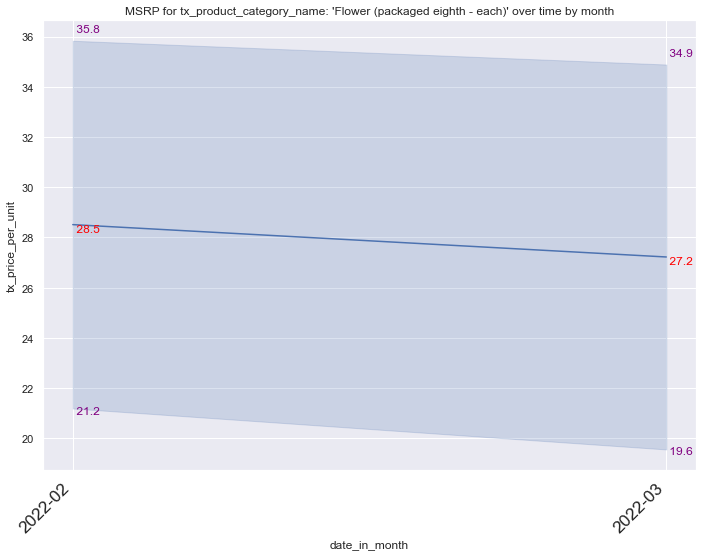

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 17.67676767676768 %
Number of transactions outliers above Boxplot Whisker Maximum is 9.595959595959595 %
Total number of transactions for Vape Cartridge (volume - each) in tx_product_category_name : 144


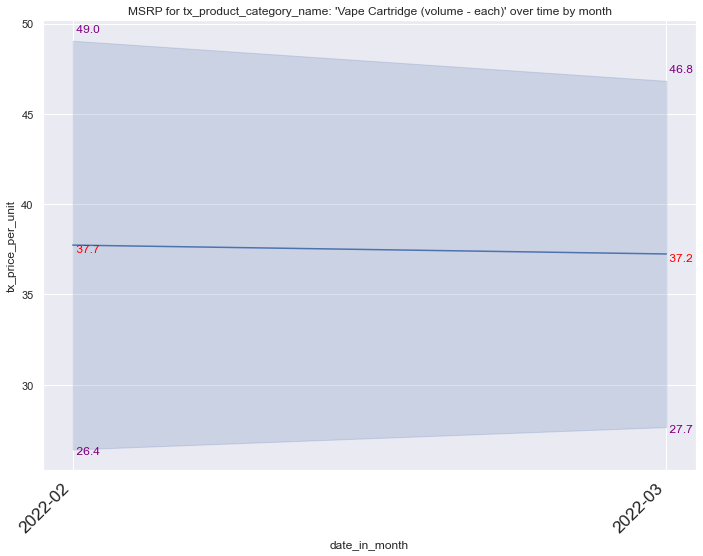

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 11.021069692058347 %
Total number of transactions for Vape Cartridge (weight - each) in tx_product_category_name : 549


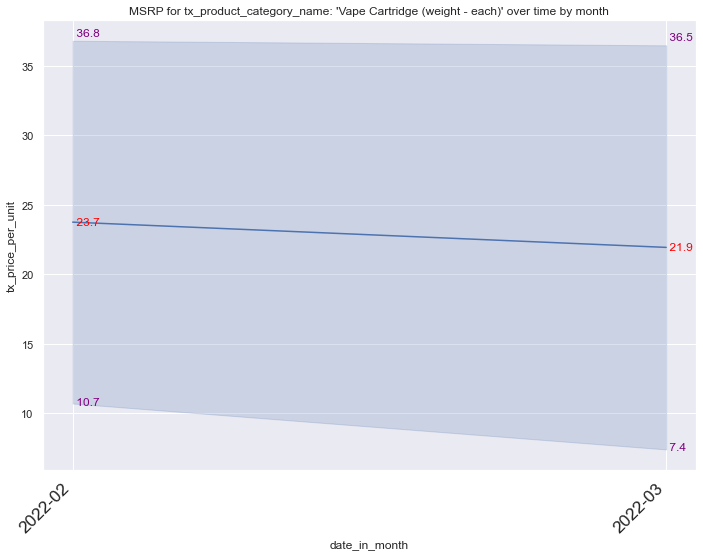

### RUN ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Edible (weight - each) in tx_product_category_name : 1026


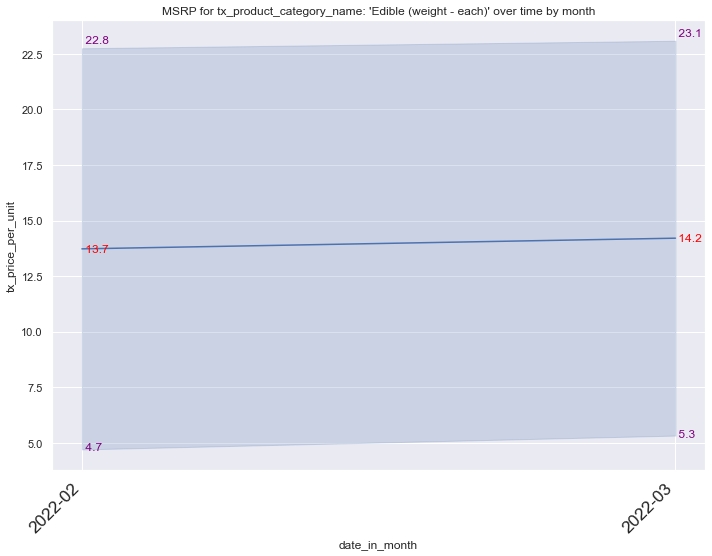

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower ###
### There are 0 rows with category name of Flower ###
### SKIPPING PRODUCT CATEGORY Flower ###
### RUN ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Extract (weight - each) in tx_product_category_name : 168


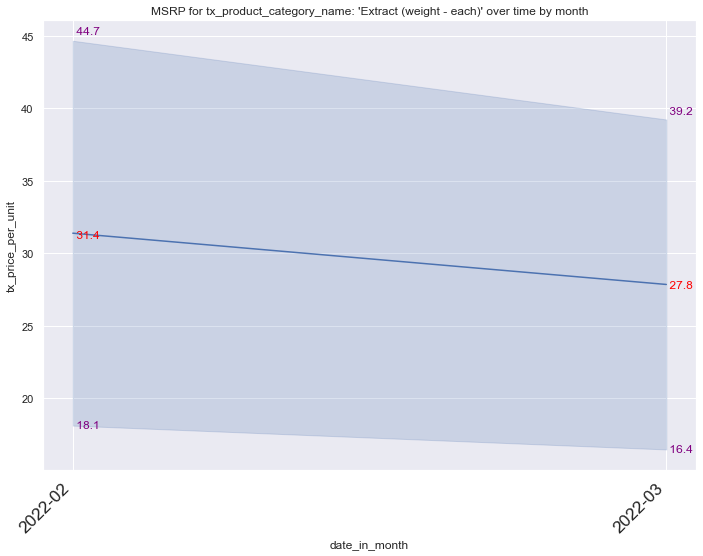

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 11.823647294589177 %
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 440


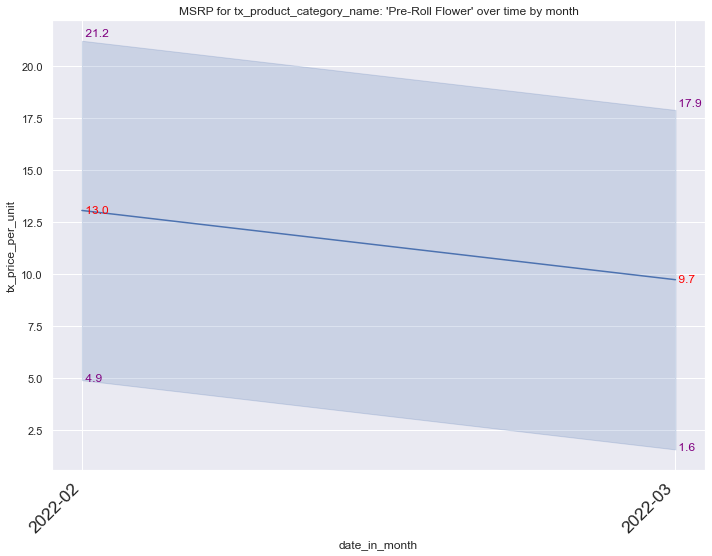

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Pre-Roll Infused in tx_product_category_name : 423


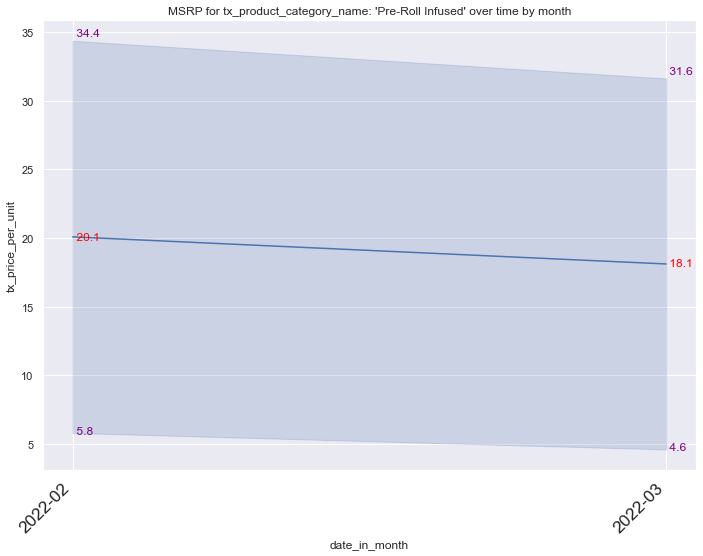

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 10.0 %
Total number of transactions for Flower (packaged half ounce - each) in tx_product_category_name : 18


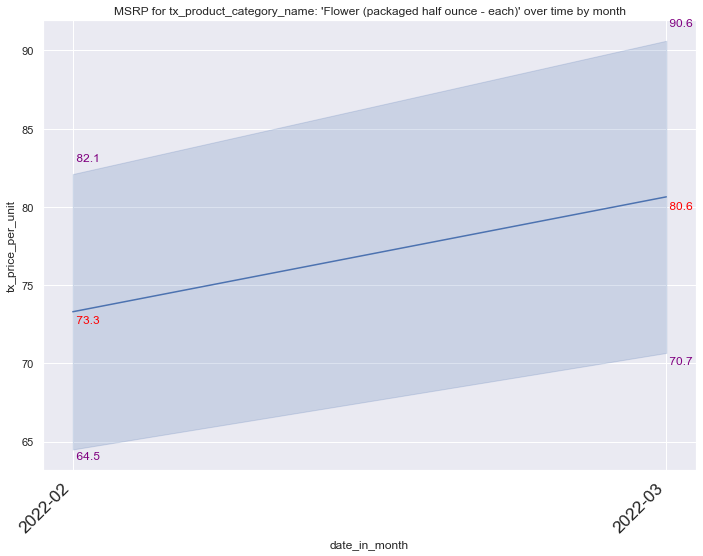

### RUN ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 2.564102564102564 %
Number of transactions outliers above Boxplot Whisker Maximum is 10.256410256410255 %
Total number of transactions for Other Concentrate (weight - each) in tx_product_category_name : 34


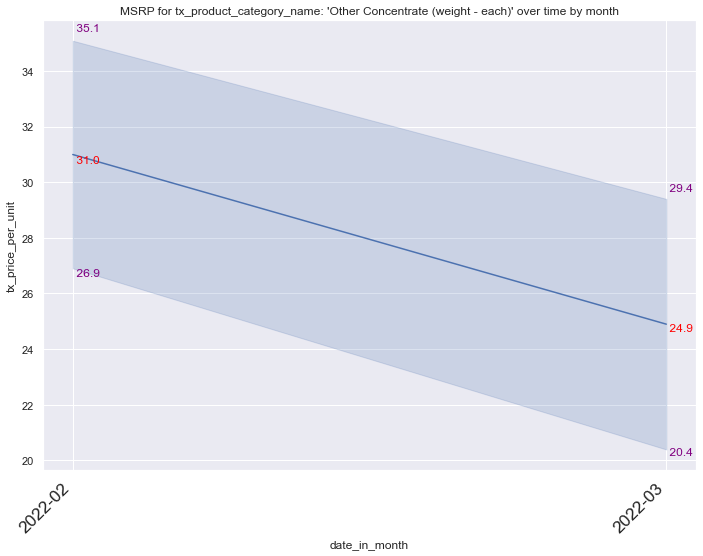

In [5]:
mba.run_time_series_plot_analysis_multi_category('tx_product_category_name', top10_product_category_list[::-1], 'S')

# COSTS Analysis

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Flower (packaged eighth - each) in product_category_name : 142


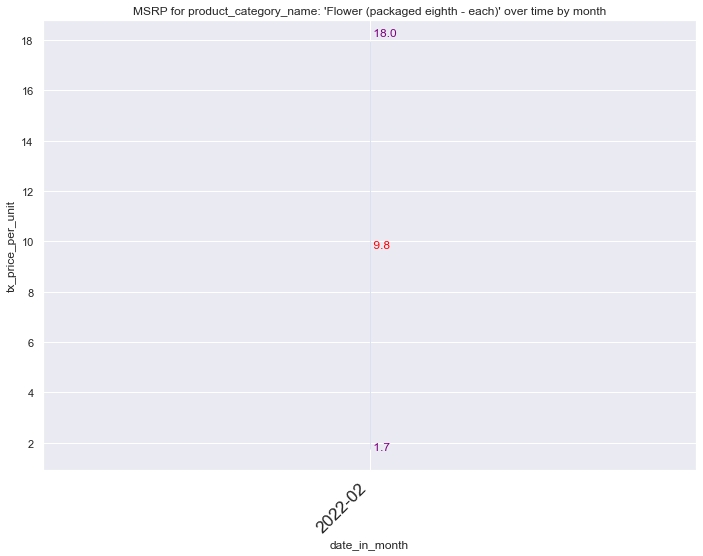

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 12.698412698412698 %
Number of transactions outliers above Boxplot Whisker Maximum is 19.047619047619047 %
Total number of transactions for Vape Cartridge (volume - each) in product_category_name : 43


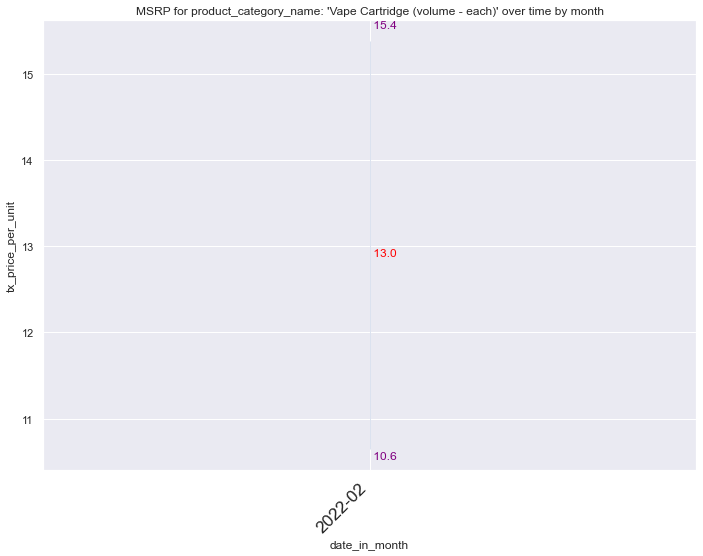

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.641025641025641 %
Total number of transactions for Vape Cartridge (weight - each) in product_category_name : 155


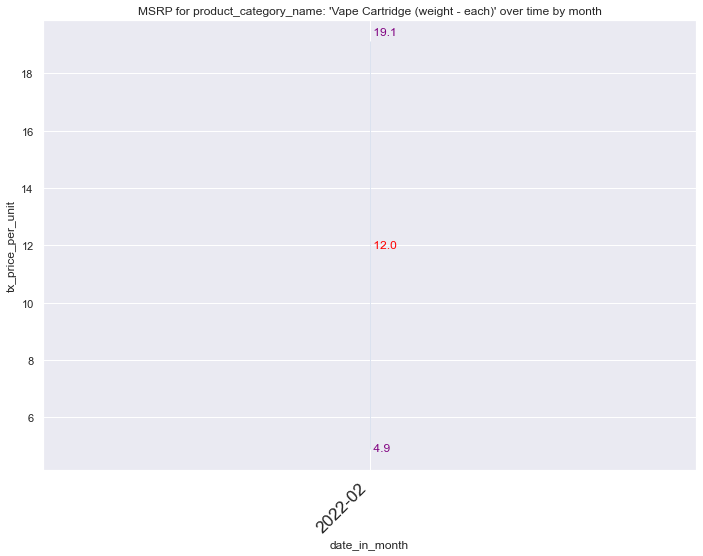

### RUN ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.9230769230769231 %
Total number of transactions for Edible (weight - each) in product_category_name : 204


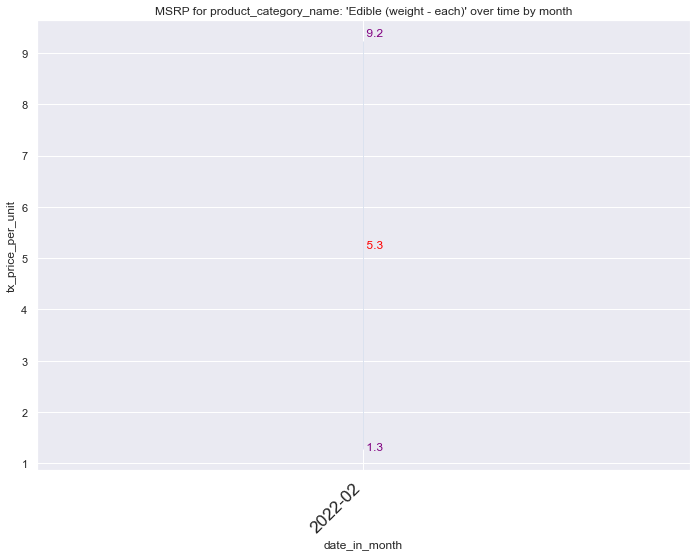

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower ###
### There are 0 rows with category name of Flower ###
### SKIPPING PRODUCT CATEGORY Flower ###
### RUN ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.4390243902439024 %
Total number of transactions for Extract (weight - each) in product_category_name : 40


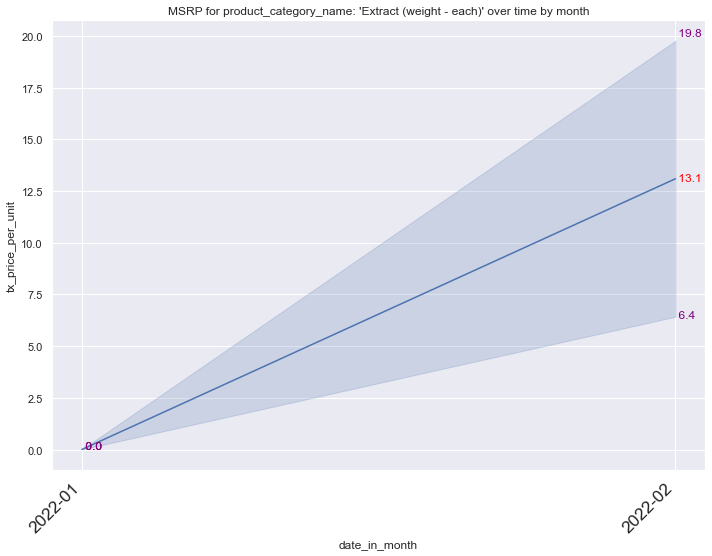

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Pre-Roll Flower in product_category_name : 118


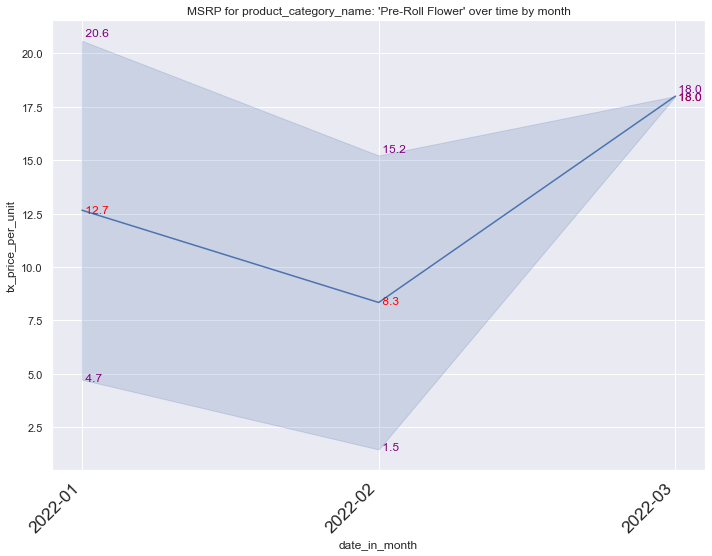

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Pre-Roll Infused in product_category_name : 69


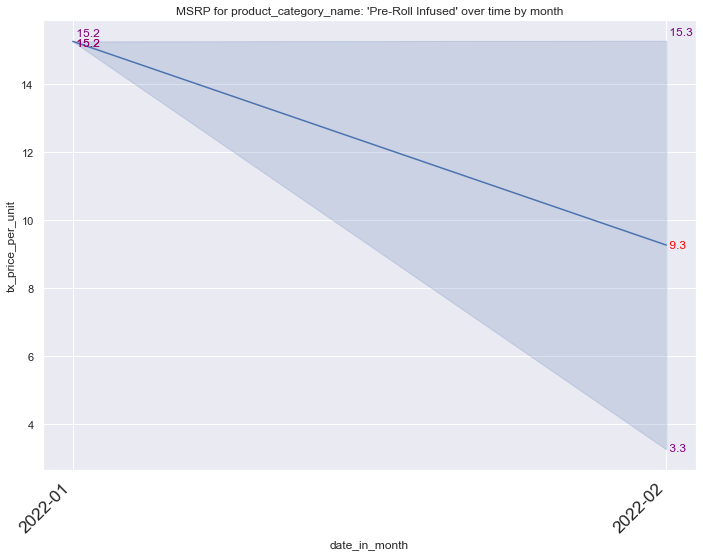

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Flower (packaged half ounce - each) in product_category_name : 8


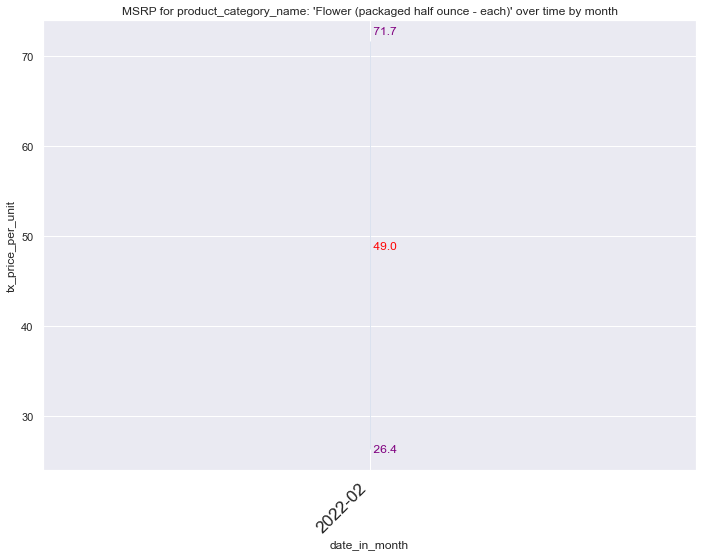

### RUN ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 8.333333333333332 %
Total number of transactions for Other Concentrate (weight - each) in product_category_name : 33


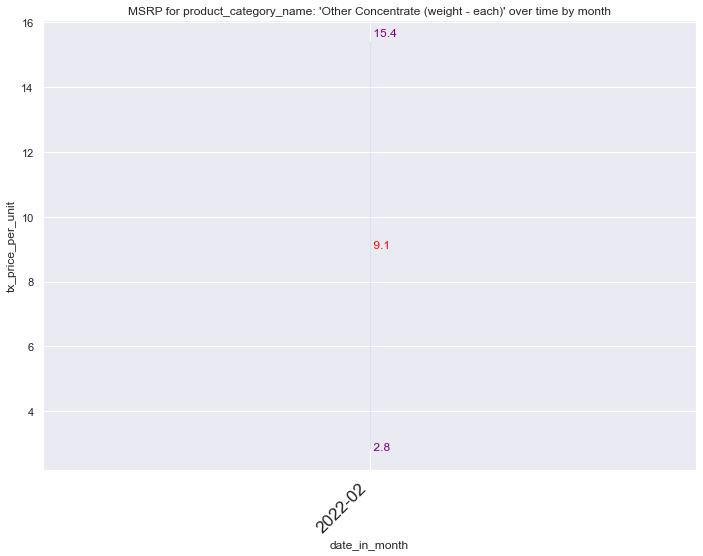

In [6]:
mba.run_time_series_plot_analysis_multi_category('product_category_name', top10_product_category_list[::-1], 'C')